# Problema de Classificação: Usando Regressão Logística

#### Prevendo se os microchips de uma planta de fabricação passam na garantia de qualidade

> "*Suponha que você seja o gerente de produto da fábrica e tenha os resultados dos testes de alguns microchips em dois testes diferentes. A partir desses dois testes, você gostaria de determinar se os microchips devem ser aceitos ou rejeitados. Para ajudá-lo a tomar a decisão, você tem um conjunto de dados de resultados de teste em microchips anteriores, a partir do qual pode construir um modelo de regressão logística.*"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
dados = pd.read_csv('ex2data2.txt', header = None) # extraindo os dados 

In [3]:
X = dados.iloc[:, 0:2] # recebe as duas primeiras colunas de 'dados'

In [4]:
y = dados.iloc[:, 2] # recebe a última coluna de dados

In [5]:
# visualizando os dados
dados.head() # visualiza os 5 primeiros exemplos nos dados

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [6]:
# visualizando os dados
print('Atributos previsores:\n', X)
print('\nClasses dos dados:\n',y)

Atributos previsores:
             0         1
0    0.051267  0.699560
1   -0.092742  0.684940
2   -0.213710  0.692250
3   -0.375000  0.502190
4   -0.513250  0.465640
..        ...       ...
113 -0.720620  0.538740
114 -0.593890  0.494880
115 -0.484450  0.999270
116 -0.006336  0.999270
117  0.632650 -0.030612

[118 rows x 2 columns]

Classes dos dados:
 0      1
1      1
2      1
3      1
4      1
      ..
113    0
114    0
115    0
116    0
117    0
Name: 2, Length: 118, dtype: int64


- Temos dois dados independentes em **X** (X[:, 0] e X[:, 1]) e um dado dependente **y**.

### Visualizando Graficamente os Dados

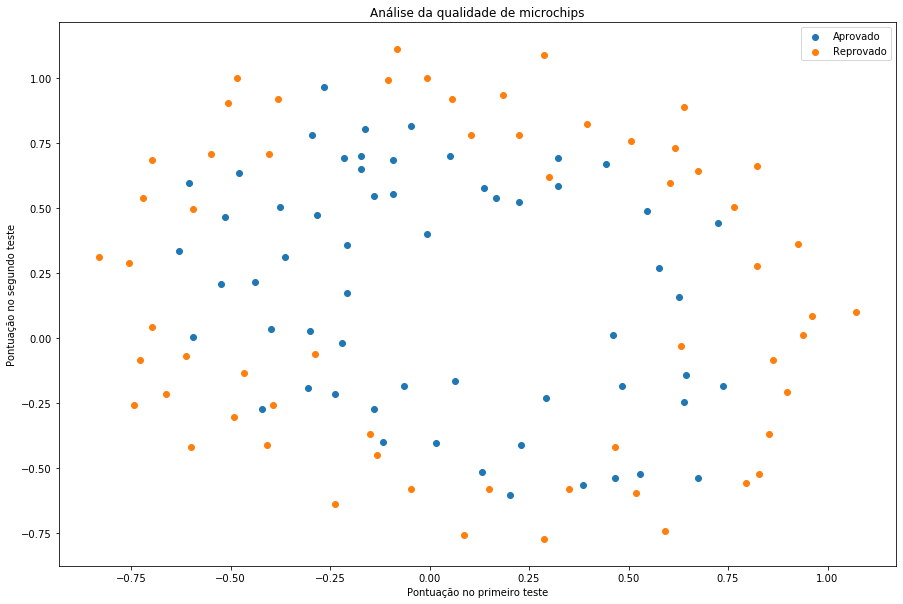

In [7]:
#definindo a dimensão do gráfico
plt.figure(figsize = (15, 10))
# preparando os dados no gráfico
auxiliar = y == 1 # define True para 1 e False para 0
aprovado = plt.scatter(X[auxiliar][0].values, X[auxiliar][1].values) # todos os exemplos em X cujo y indica classe 1
reprovado = plt.scatter(X[~auxiliar][0].values, X[~auxiliar][1].values) # todos os exemplos em X cujo y indica classe 0
# definindo legendaas ao gráfico
plt.title('Análise da qualidade de microchips')
plt.xlabel('Pontuação no primeiro teste')
plt.ylabel('Pontuação no segundo teste')
plt.legend((aprovado, reprovado), ('Aprovado', 'Reprovado'))

### Mapa de Características

![mapa-caracteristicas](Imagens/mapa-caracteristicas.PNG)

In [8]:
def mapaCaracteristica(X1, X2):
    '''
    1 - Criando mais recursos com os dados (ajustar melhor os dados);
    2 - mapear os recursos de todos os termos polinomiais de x1 e x2 até a sexta potência;
    '''
    grau = 6
    saida = np.ones(X.shape[0])[:,np.newaxis]
    
    for i in range(1, grau+1):
        for j in range(i+1):
            saida = np.hstack((saida, np.multiply(np.power(X1, i-j), np.power(X2, j))[:,np.newaxis]))
            
    return saida

![expansao-binomios](Imagens/expansao-binomios.PNG)

In [9]:
# visualizando os passos da potência (2 + 3 + 4 + 5 + 6 + 7) + bias = 28
for i in range(1, 6+1):
        for j in range(i+1):
            print(i-j, j)

1 0
0 1
2 0
1 1
0 2
3 0
2 1
1 2
0 3
4 0
3 1
2 2
1 3
0 4
5 0
4 1
3 2
2 3
1 4
0 5
6 0
5 1
4 2
3 3
2 4
1 5
0 6


In [10]:
X = mapaCaracteristica(X.iloc[:,0], X.iloc[:,1]) 

In [11]:
X.shape # observando a dimensão dos meus novos dados

(118, 28)

### CUIDADO COM OS AJUSTES EXCESSIVOS!

### Implementação da Regressão Logística

In [12]:
def sigmoide(X):
    '''
    Implementação da função sigmoide
    '''
    return 1 / (1+ np.exp(-X))

![regressao-logistica-regularizada](Imagens/regressao-logistica-regularizada.PNG)

![equacao-regularizada](Imagens/equacao-regularizada.png)

In [13]:
def funcaoCusto(teta, X, y, lmbd):
    '''
    Implementando a função de custo com um regularizador
    '''
    m = len(y)
    J = (-1/m) * ((y.T).dot(np.log(sigmoide(X.dot(teta)))) + (1 - y.T).dot(np.log(1 - sigmoide(X.dot(teta)))))
    regularizador = (lmbd/(2*m)) * ((teta[1:].T).dot(teta[1:]))
    J = J + regularizador
    return J

![gradiente-pesos](Imagens/gradiente-pesos.PNG)

In [14]:
def gradiente(teta, X, y, lmbd):
    '''
    Implementando o gradiente descendente com um regularizador
    '''
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * (X.T).dot((sigmoide(X.dot(teta)) - y))
    grad[1:] = grad[1:] + (lmbd / m) * teta[1:]
    return grad

In [15]:
(m, n) = X.shape
y = y[:, np.newaxis]
teta = np.zeros((n,1))
lmbd = 1
J = funcaoCusto(teta, X, y, lmbd)
print(J)

[[0.69314718]]


In [16]:
# usando o otimizado do scipy para minimizar a função de custo
output = opt.fmin_tnc(func = funcaoCusto, x0 = teta.flatten(), fprime = gradiente, args = (X, y.flatten(), lmbd))

In [22]:
lmbd

1

In [17]:
teta = output[0]
print(teta) # visualizando os valores otimizados de teta

[ 1.27271026  0.62529965  1.18111686 -2.01987399 -0.91743189 -1.43166929
  0.12393228 -0.36553118 -0.35725403 -0.17516291 -1.4581701  -0.05098417
 -0.61558554 -0.27469165 -1.19271298 -0.24217841 -0.20603299 -0.04466179
 -0.27778951 -0.29539513 -0.45645982 -1.04319155  0.02779373 -0.2924487
  0.0155576  -0.32742405 -0.1438915  -0.92467487]


### Acurácia do Modelo

In [18]:
pred = [sigmoide(np.dot(X, teta)) >= 0.5] # realizando a predição com os dados
np.mean(pred == y.flatten()) * 100 # visualizando a média de acertos

83.05084745762711

### Visualizando o Modelo Treinando

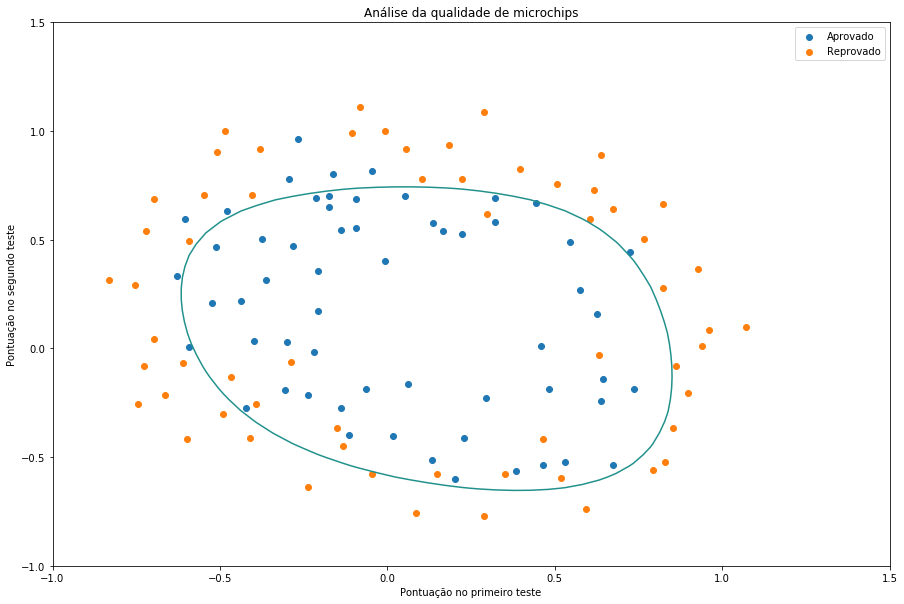

In [21]:
u = np.linspace(-1, 1.5, 50) # 50 valores randômicos para u de [-1, 1.5]
v = np.linspace(-1, 1.5, 50) # 50 valores randômicos para v de [-1, 1.5]
z = np.zeros((len(u), len(v))) # matriz de zeros [50,50]

def mapaCaracteristicaPlotar(X1, X2):
    '''
    Função para plotar o mapa de características obtido (polinômio até a sexta ordem)
    '''
    grau = 6
    saida = np.ones(1)
    for i in range(1, grau + 1):
        for j in range(i + 1):
            saida = np.hstack((saida, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return saida


for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapaCaracteristicaPlotar(u[i], v[j]), teta)

plt.figure(figsize = (15, 10))
# preparando os dados no gráfico
auxiliar = y.flatten() == 1 # define True para 1 e False para 0
X = dados.iloc[:,:-1]
aprovado = plt.scatter(X[auxiliar][0], X[auxiliar][1]) # todos os exemplos em X cujo y indica classe 1
reprovado = plt.scatter(X[~auxiliar][0], X[~auxiliar][1]) # todos os exemplos em X cujo y indica classe 0
plt.contour(u,v,z, 0) # visualizando dados em 3-D usando um gráfico 2-D (usando curvas de nível)
# definindo legendaas ao gráfico
plt.title('Análise da qualidade de microchips')
plt.xlabel('Pontuação no primeiro teste')
plt.ylabel('Pontuação no segundo teste')
plt.legend((aprovado, reprovado), ('Aprovado', 'Reprovado'))